In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

!wget https://raw.githubusercontent.com/Iamsdt/DLProjects/master/utils/Helper.py

--2021-11-14 15:27:05--  https://raw.githubusercontent.com/Iamsdt/DLProjects/master/utils/Helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21413 (21K) [text/plain]
Saving to: ‘Helper.py.2’

Helper.py.2         100%[===================>]  20.91K  --.-KB/s    in 0.001s  

2021-11-14 15:27:05 (32.5 MB/s) - ‘Helper.py.2’ saved [21413/21413]



In [ ]:
#Impoerting all the libraries
import torch
import torchvision
import numpy as np
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
import cv2
import os
import math
import random
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision.datasets import ImageFolder
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split

In [ ]:
from torchvision import models
from torchvision import transforms
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import Helper
import torch

from torchvision import datasets, transforms,models
from torch.utils.data import DataLoader
data_dir =  "/content/drive/MyDrive/NFT DATASET(Only Train)/Train"
mean = [0.5, 0.5, 0.5]
std = [0.5, 0.5, 0.5]

train_transform = transforms.Compose([
                                transforms.Resize(255),
                                transforms.RandomResizedCrop(227),
                                transforms.RandomHorizontalFlip(),
                                transforms.ColorJitter(),
                                transforms.ToTensor(),
                                transforms.Normalize(mean, std)])

#Getting the dataset

dataset = ImageFolder(data_dir,transform = train_transform)
print(len(dataset))

611


In [ ]:
train_size = 487
test_size= 124
batch_size = 64

In [ ]:
#Splitting the dataset
train_data,test_data = random_split(dataset,[train_size,test_size])
train_dl = DataLoader(train_data, batch_size, shuffle = True, num_workers = 2, pin_memory = True)
test_dl = DataLoader(test_data, batch_size=124, num_workers = 2, pin_memory = True)

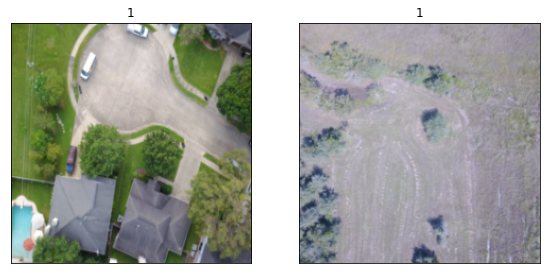

In [ ]:
classes = [0,1]
Helper.visualize(test_dl, classes)

In [ ]:
#Getting the densenet161 Model
densenet= models.densenet161(pretrained=True)
densenet.classifier

Linear(in_features=2208, out_features=1000, bias=True)

In [ ]:
densenet= Helper.freeze_parameters(densenet)

In [ ]:
import torch.nn as nn
from collections import OrderedDict

classifier = nn.Sequential(
  nn.Linear(in_features=2208, out_features=1024),
  nn.ReLU(),
  nn.Dropout(p=0.4),
  nn.Linear(in_features=1024, out_features=2),
  nn.LogSoftmax(dim=1)  
)
    
densenet.classifier = classifier
densenet.classifier

Sequential(
  (0): Linear(in_features=2208, out_features=1024, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.4, inplace=False)
  (3): Linear(in_features=1024, out_features=2, bias=True)
  (4): LogSoftmax(dim=1)
)

In [ ]:
import torch.optim as optim
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
densenet.to(device)

criterion = nn.NLLLoss()
optimizer = optim.Adam(densenet.classifier.parameters(), lr=0.003)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

In [ ]:
epoch=5

In [ ]:
#Training the densenet161 Model
densenet, train_loss, test_loss = Helper.train(densenet, train_dl, test_dl, epoch, optimizer, criterion)

Epoch: 1/5
		Going for validation
	Train loss:1.008211.. 	Valid Loss:1.037700.. 	Accuracy: 79.0323
	Validation loss decreased (inf --> 1.037700).  Saving model ...
	Epoch:1 completed in 6m 47s
Epoch: 2/5
		Going for validation
	Train loss:0.493246.. 	Valid Loss:0.275955.. 	Accuracy: 92.7419
	Validation loss decreased (1.037700 --> 0.275955).  Saving model ...
	Epoch:2 completed in 7m 31s
Epoch: 3/5
		Going for validation
	Train loss:0.165529.. 	Valid Loss:0.213377.. 	Accuracy: 92.7419
	Validation loss decreased (0.275955 --> 0.213377).  Saving model ...
	Epoch:3 completed in 7m 12s
Epoch: 4/5
		Going for validation
	Train loss:0.147096.. 	Valid Loss:0.225215.. 	Accuracy: 91.9355
	Epoch:4 completed in 7m 31s
Epoch: 5/5
		Going for validation
	Train loss:0.156811.. 	Valid Loss:0.238114.. 	Accuracy: 91.9355
	Epoch:5 completed in 7m 23s
Training completed in 36m 24s


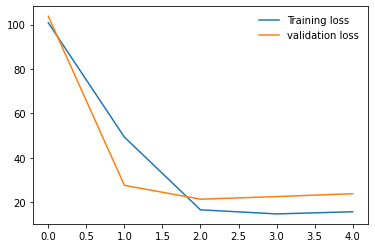

In [ ]:
Helper.check_overfitted(train_loss, test_loss)

In [ ]:
#Getting the resnet50 Model
resnet = models.resnet50(pretrained=True)
resnet.fc

Linear(in_features=2048, out_features=1000, bias=True)

In [ ]:
resnet = Helper.freeze_parameters(resnet)
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
import torch.nn as nn
from collections import OrderedDict

classifier = nn.Sequential(
  nn.Linear(in_features=2048, out_features=1024),
  nn.ReLU(),
  nn.Dropout(p=0.4),
  nn.Linear(in_features=1024, out_features=2),
  nn.LogSoftmax(dim=1)  
)
    
resnet.fc = classifier
resnet.fc

Sequential(
  (0): Linear(in_features=2048, out_features=1024, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.4, inplace=False)
  (3): Linear(in_features=1024, out_features=2, bias=True)
  (4): LogSoftmax(dim=1)
)

In [ ]:
resnet.to(device)
optimizer = optim.Adam(resnet.fc.parameters(), lr=0.003)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

In [ ]:
#Training the resnet50 model
resnet, train_loss, test_loss = Helper.train(resnet, train_dl, test_dl, epoch, optimizer, criterion)

Epoch: 1/5
		Going for validation
	Train loss:3.314749.. 	Valid Loss:0.264011.. 	Accuracy: 90.3226
	Validation loss decreased (inf --> 0.264011).  Saving model ...
	Epoch:1 completed in 5m 0s
Epoch: 2/5
		Going for validation
	Train loss:0.641056.. 	Valid Loss:0.539056.. 	Accuracy: 77.4194
	Epoch:2 completed in 5m 5s
Epoch: 3/5
		Going for validation
	Train loss:0.267641.. 	Valid Loss:0.285650.. 	Accuracy: 91.9355
	Epoch:3 completed in 4m 60s
Epoch: 4/5
		Going for validation
	Train loss:0.227303.. 	Valid Loss:0.283458.. 	Accuracy: 91.1290
	Epoch:4 completed in 4m 49s
Epoch: 5/5
		Going for validation
	Train loss:0.182377.. 	Valid Loss:0.274131.. 	Accuracy: 87.9032
	Epoch:5 completed in 4m 47s
Training completed in 24m 40s


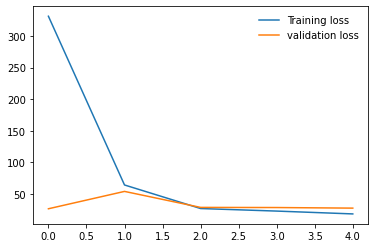

In [ ]:
Helper.check_overfitted(train_loss, test_loss)

In [ ]:
#Getting the densenet201 Model
densenet2 = models.densenet201(pretrained=True)
densenet2.classifier

Linear(in_features=1920, out_features=1000, bias=True)

In [ ]:
densenet2 = Helper.freeze_parameters(densenet2)

In [ ]:
import torch.nn as nn
from collections import OrderedDict

classifier = nn.Sequential(
  nn.Linear(in_features=1920, out_features=1024),
  nn.ReLU(),
  nn.Dropout(p=0.4),
  nn.Linear(in_features=1024, out_features=2),
  nn.LogSoftmax(dim=1)  
)
    
densenet2.classifier = classifier
densenet2.classifier

Sequential(
  (0): Linear(in_features=1920, out_features=1024, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.4, inplace=False)
  (3): Linear(in_features=1024, out_features=2, bias=True)
  (4): LogSoftmax(dim=1)
)

In [ ]:
import torch.optim as optim
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
densenet2.to(device)

criterion = nn.NLLLoss()
optimizer = optim.Adam(densenet2.classifier.parameters(), lr=0.003)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

In [ ]:
epoch=5

In [ ]:
#Training the densenet201 Model
densenet2, train_loss, test_loss = Helper.train(densenet2, train_dl, test_dl, epoch, optimizer, criterion)

Epoch: 1/5
		Going for validation
	Train loss:1.368888.. 	Valid Loss:0.359783.. 	Accuracy: 83.8710
	Validation loss decreased (inf --> 0.359783).  Saving model ...
	Epoch:1 completed in 5m 48s
Epoch: 2/5
		Going for validation
	Train loss:0.261218.. 	Valid Loss:0.318382.. 	Accuracy: 87.0968
	Validation loss decreased (0.359783 --> 0.318382).  Saving model ...
	Epoch:2 completed in 5m 43s
Epoch: 3/5
		Going for validation
	Train loss:0.191387.. 	Valid Loss:0.293979.. 	Accuracy: 88.7097
	Validation loss decreased (0.318382 --> 0.293979).  Saving model ...
	Epoch:3 completed in 5m 43s
Epoch: 4/5
		Going for validation
	Train loss:0.145081.. 	Valid Loss:0.214932.. 	Accuracy: 91.1290
	Validation loss decreased (0.293979 --> 0.214932).  Saving model ...
	Epoch:4 completed in 6m 5s
Epoch: 5/5
		Going for validation
	Train loss:0.162695.. 	Valid Loss:0.225172.. 	Accuracy: 91.9355
	Epoch:5 completed in 5m 39s
Training completed in 28m 58s


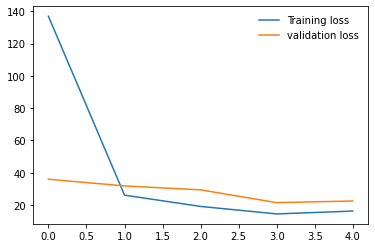

In [ ]:
Helper.check_overfitted(train_loss, test_loss)

In [ ]:
#Creating the ensembling Model
import torch.nn as nn
import torch

class MyEnsemble(nn.Module):

    def __init__(self, modelA, modelB, modelC, input):
        super(MyEnsemble, self).__init__()
        self.modelA = modelA
        self.modelB = modelB
        self.modelC = modelC

        self.fc1 = nn.Linear(input, 2)

    def forward(self, x):
        out1 = self.modelA(x)
        out2 = self.modelB(x)
        out3 = self.modelC(x)

        out = (out1 + out2 + out3)/3      #Averaging Method

        x = self.fc1(out)
        return torch.softmax(x, dim=1)


In [ ]:
model = MyEnsemble(densenet, resnet, densenet2,2)

In [ ]:
model.to(device)
optimizer = optim.Adam(model.parameters(),lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

In [ ]:
#Training the ensemble Model
model, train_loss, test_loss = Helper.train(model, train_dl, test_dl, epoch, optimizer, criterion)

Epoch: 1/5
		Going for validation
	Train loss:-0.705752.. 	Valid Loss:-0.762564.. 	Accuracy: 83.8710
	Validation loss decreased (inf --> -0.762564).  Saving model ...
	Epoch:1 completed in 14m 6s
Epoch: 2/5
		Going for validation
	Train loss:-0.745326.. 	Valid Loss:-0.758646.. 	Accuracy: 87.0968
	Epoch:2 completed in 15m 38s
Epoch: 3/5
		Going for validation
	Train loss:-0.769606.. 	Valid Loss:-0.795636.. 	Accuracy: 93.5484
	Validation loss decreased (-0.762564 --> -0.795636).  Saving model ...
	Epoch:3 completed in 14m 38s
Epoch: 4/5
		Going for validation
	Train loss:-0.791935.. 	Valid Loss:-0.794899.. 	Accuracy: 89.5161
	Epoch:4 completed in 15m 4s
Epoch: 5/5
		Going for validation
	Train loss:-0.797109.. 	Valid Loss:-0.810713.. 	Accuracy: 88.7097
	Validation loss decreased (-0.795636 --> -0.810713).  Saving model ...
	Epoch:5 completed in 14m 37s
Training completed in 74m 4s


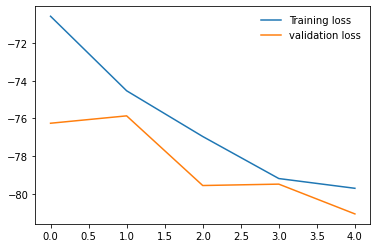

In [ ]:
Helper.check_overfitted(train_loss, test_loss)

In [ ]:
dataiter = iter(test_dl)
images, labels = dataiter.next()
classes = ('Flooded', 'Non-Flooded')
# print images
im_grid=torchvision.utils.make_grid(images[1:9])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:  Non-Flooded Non-Flooded Non-Flooded Non-Flooded Flooded Flooded Flooded Flooded
Predicted:    Non-Flooded Non-Flooded Non-Flooded Non-Flooded Flooded Flooded Flooded Flooded


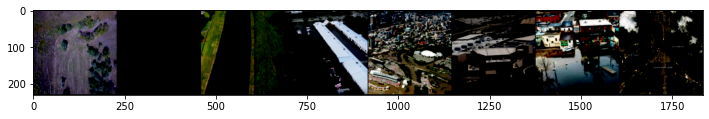

In [ ]:
#Testing Model With images
plt.figure(figsize=(12,12))
plt.imshow(im_grid.permute(1,2, 0))
print('GroundTruth: ', ' '.join('%s' % classes[labels[j]] for j in range(8)))
outputs = model(images)
_, predicted = torch.max(outputs, 1)
print('Predicted:   ', ' '.join('%s' % classes[predicted[j]] for j in range(8)))